In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-price-prediction-data/housing_price_dataset.csv


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/kaggle/input/housing-price-prediction-data/housing_price_dataset.csv')

In [4]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [5]:
df.columns

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price'],
      dtype='object')

In [6]:
df.shape

(50000, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [8]:
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [9]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [10]:
df.dtypes

SquareFeet        int64
Bedrooms          int64
Bathrooms         int64
Neighborhood     object
YearBuilt         int64
Price           float64
dtype: object

In [11]:
df.Neighborhood.value_counts()

Neighborhood
Suburb    16721
Rural     16676
Urban     16603
Name: count, dtype: int64

In [12]:
def convert_to_binary(x):
    if x == 'Suburb':
        return 1
    elif x == 'Rural':
        return 2
    else:
        return 3
df['Neighborhood'] = df['Neighborhood'].apply(convert_to_binary)
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,2,1969,215355.283618
1,2459,3,2,2,1980,195014.221626
2,1860,2,1,1,1970,306891.012076
3,2294,2,1,3,1996,206786.787153
4,2130,5,2,1,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,2,1975,100080.865895
49996,2854,2,2,1,1988,374507.656727
49997,2979,5,3,1,1962,384110.555590
49998,2596,5,2,2,1984,380512.685957


In [13]:
df.corr()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
SquareFeet,1.000000,-0.002638,-0.003275,0.012234,0.000482,0.750720
Bedrooms,-0.002638,1.000000,0.007405,0.000523,0.003147,0.072624
Bathrooms,-0.003275,0.007405,1.000000,-0.003139,0.003748,0.028418
Neighborhood,0.012234,0.000523,-0.003139,1.000000,-0.003375,0.021065
YearBuilt,0.000482,0.003147,0.003748,-0.003375,1.000000,-0.002288
Price,0.750720,0.072624,0.028418,0.021065,-0.002288,1.000000


#### we can say that square feet and price are highly correlated

In [14]:
from matplotlib import pyplot as plt

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

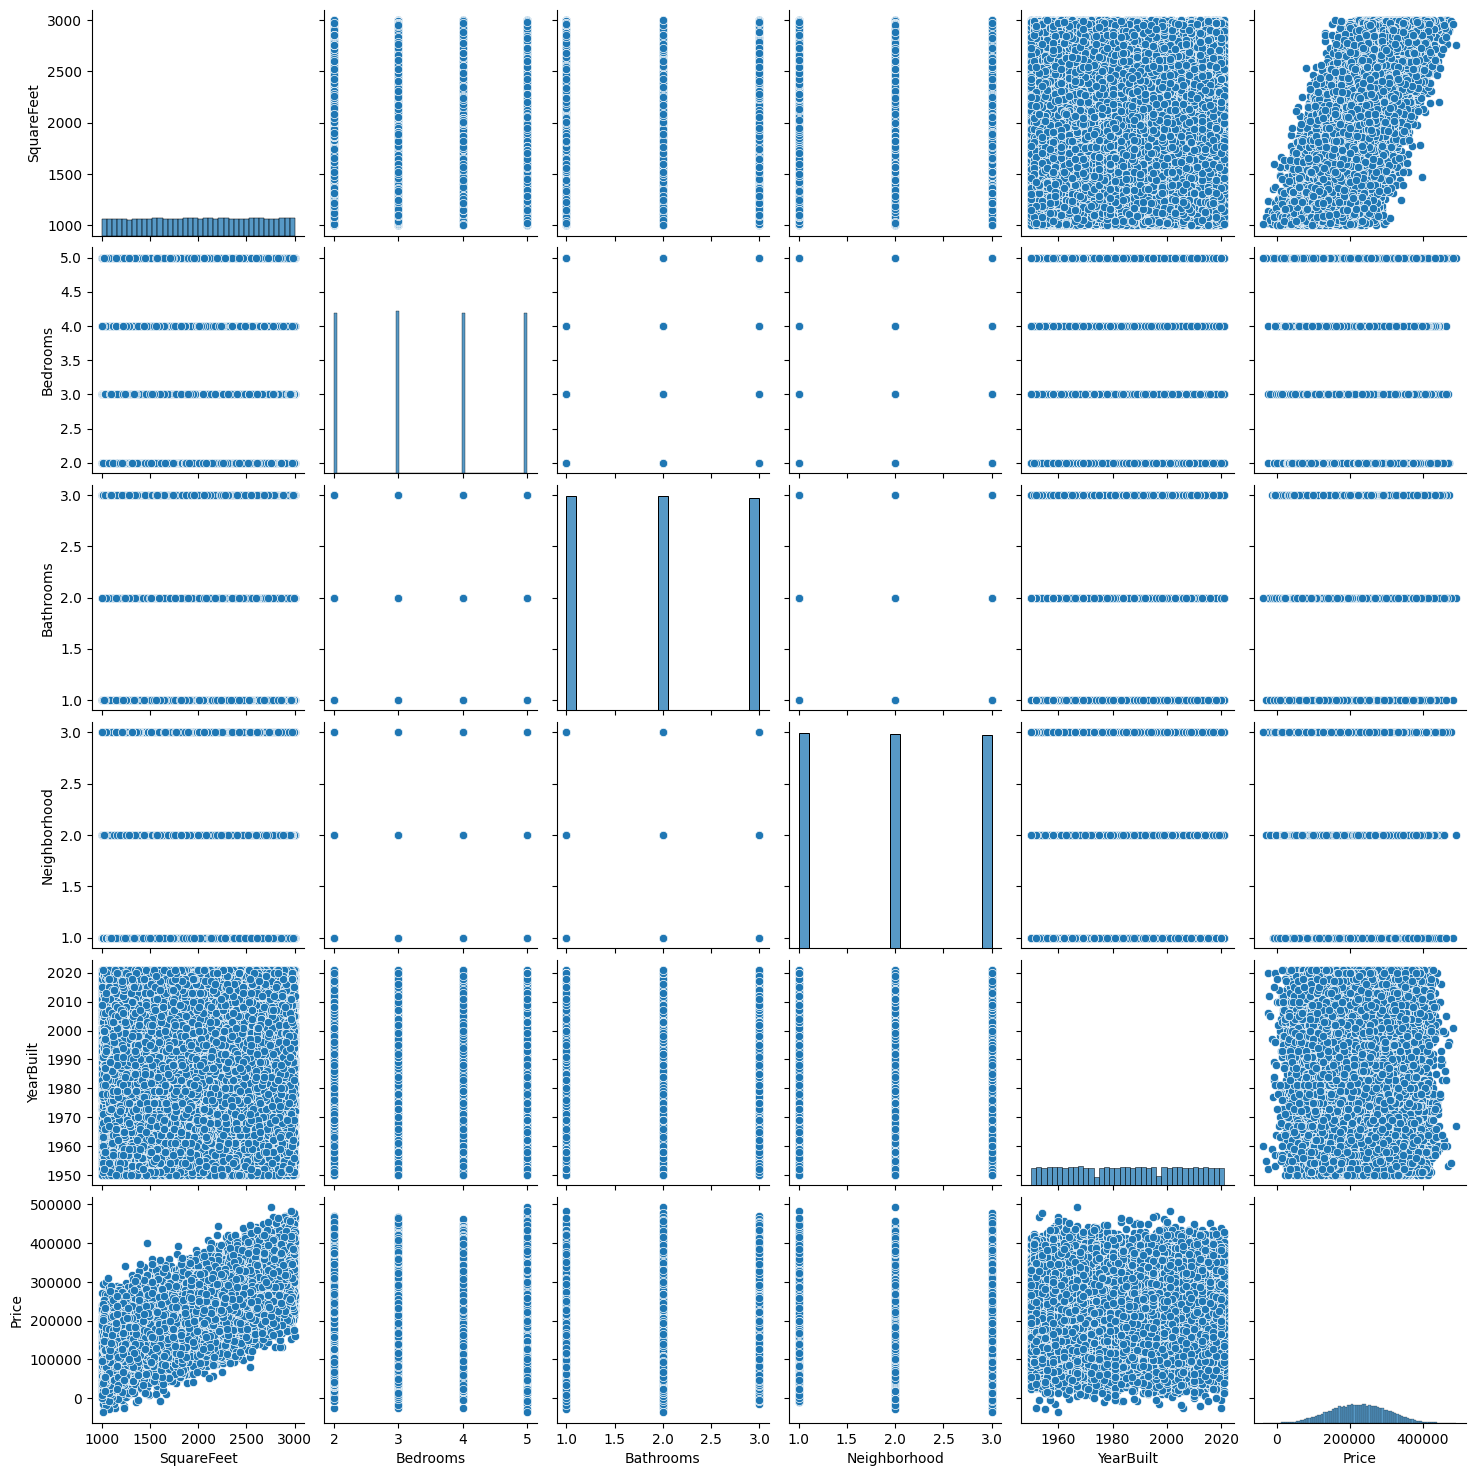

In [15]:
import seaborn as sns
sns.pairplot(df)

### Correlation Map

<Axes: >

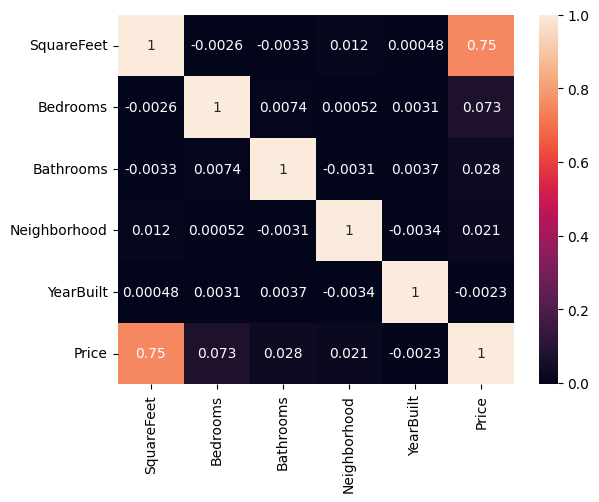

In [16]:
sns.heatmap(df.corr(), annot=True)


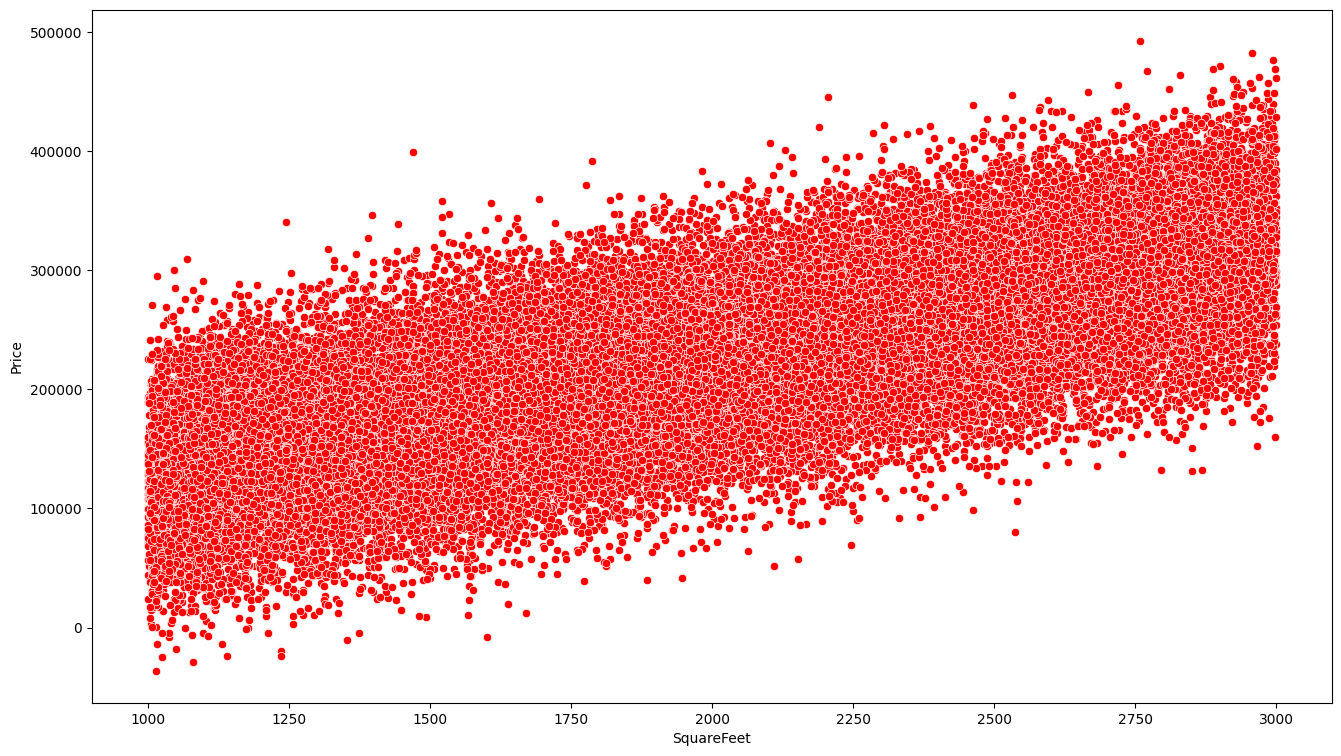

In [17]:
plt.figure(figsize=(16,9))
sns.scatterplot(x='SquareFeet',y='Price',data=df,color='red')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(df[['SquareFeet']],df['Price'],test_size=0.2,random_state=2)

In [20]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((40000, 1), (10000, 1), (40000,), (10000,))

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train,y_train)

In [22]:
lr

LinearRegression()

In [23]:
lr.score(X_test,y_test)


0.5565546836696201

In [24]:
from sklearn.metrics import mean_squared_error,r2_score

In [25]:
y_pred = lr.predict(X_test)
y_pred


array([146584.00080561, 193893.62000655, 160926.28536337, ...,
       233235.30334207, 292297.62794451, 129851.33548822])

In [26]:
score = r2_score(y_test,y_pred)
print('R^2 score is',score)

R^2 score is 0.5565546836696201


In [27]:
X_train.values.reshape(-1,1)

array([[1519],
       [1833],
       [1364],
       ...,
       [2573],
       [1319],
       [1184]])

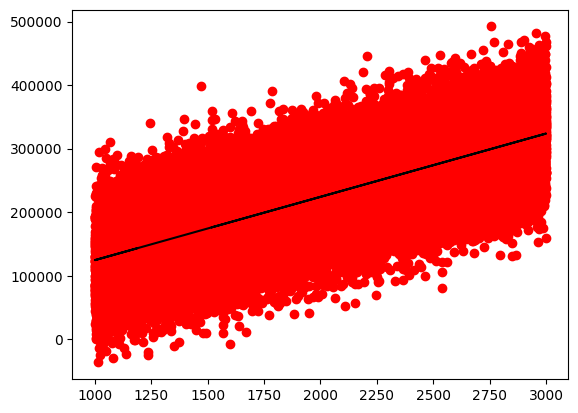

In [28]:
plt.scatter(df['SquareFeet'],df['Price'],color='red')
plt.plot(X_train,lr.predict(X_train),color='black')
plt.show()

In [29]:
lr.coef_

array([99.59919832])

In [30]:
lr.intercept_


24873.780461285292

### so line is y = 99.6x square feet + 24873.8

In [31]:
#Multiple Linear Regression
x = df[['SquareFeet','Bedrooms','Bathrooms','YearBuilt']]
y = df['Price']

In [32]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
lr = LinearRegression().fit(X_train,y_train)
y_pred = lr.predict(X_test)
score = r2_score(y_test,y_pred)
print('R^2 score is',score)

R^2 score is 0.5630499327755206


In [33]:
x

,SquareFeet,Bedrooms,Bathrooms,YearBuilt
0,2126,4,1,1969
1,2459,3,2,1980
2,1860,2,1,1970
3,2294,2,1,1996
4,2130,5,2,2001
...,...,...,...,...
49995,1282,5,3,1975
49996,2854,2,2,1988
49997,2979,5,3,1962
49998,2596,5,2,1984


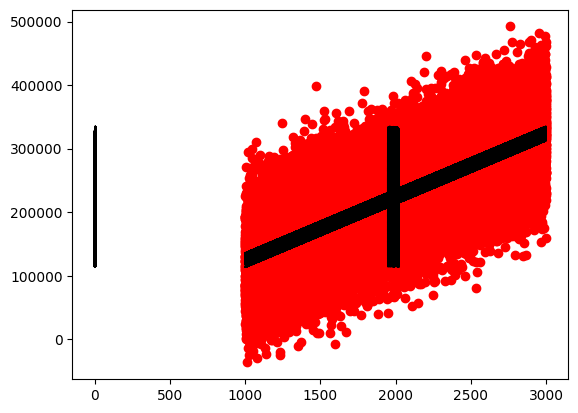

In [34]:
plt.scatter(df['SquareFeet'],df['Price'],color='red')
plt.plot(X_train,lr.predict(X_train),color='black')
plt.show()

### trying with min max scaler

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
for column in df.columns:
    df[column] = scaler.fit_transform(df[[column]])


In [38]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,0.563282,0.666667,0.0,0.5,0.267606,0.476459
1,0.729865,0.333333,0.5,0.5,0.422535,0.437991
2,0.430215,0.000000,0.0,0.0,0.281690,0.649565
3,0.647324,0.000000,0.0,1.0,0.647887,0.460255
4,0.565283,1.000000,0.5,0.0,0.718310,0.584406


In [39]:
X_train,X_test,y_train,y_test = train_test_split(df[['SquareFeet','Bedrooms','Bathrooms','Neighborhood','YearBuilt']],df['Price'],test_size=0.2,random_state=2)
lr = LinearRegression().fit(X_train,y_train)
y_pred = lr.predict(X_test)
score = r2_score(y_test,y_pred)
print('R^2 score is',score)


R^2 score is 0.5633555755353048


In [40]:
# lets try DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

In [41]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
# score_train = model.score(X_train,y_train)


In [42]:
# DES score
# score = r2_score(y_test,y_pred)
print('R^2 train score is',r2_score(y_train,y_train_pred))
print('R^2 score is',r2_score(y_test,y_pred))

R^2 train score is 0.9986004409898618
R^2 score is 0.06817916197283813


## Overfitting of DecisionTreeRegressor

In [43]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)
x_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
score_train = r2_score(y_train,x_train_pred)
score = r2_score(y_test,y_pred)
print('R^2 score is',score_train)
print('R^2 score is',score)


R^2 score is 0.9317990461520801
R^2 score is 0.5036455283161613
